<h1><center><font color=green><b><u>Counting Inversions</u></b></font></center></h1>

'Counting Inversion' algorithm calculates how far (or close) the array is from being sorted. If array is already sorted then inversion count is 0. If array is sorted in reverse order then inversion count is the maximum.

In this algorithm, for a given input array of size n, it will count how many steps it requires to convert it to a sorted sequence of n numbers (1, 2, 3, ...., n). It uses the concept of 'Divide-and-Conquer' algorithm.

***Example:***

For an input array of \[1,3,4,2\], it first divides the array into two sections and generates the left branch \[1,3\]. It further divides the left branch into two sections, \[1\] and \[3\]. These two arrays won't be divided any further. Number of inversion counts for \[1\] and \[3\] is 0 respectively. Next, these two arrays will be merged in a sorted manner and the required number of inversions for merging will added to the number of inversions required for left and right branches. Here, \[1,3\] is already sorted. So, total number of recursions till now is 0+0+0 = 0. 

Now, it will generate the right branch \[4,2\] for the array \[1,3,4,2\]. This \[4,2\] will be further divided into \[4\] and \[2\]. To merge them in a sorted manner, number of inversions required is 1 (between 4->2 to 2->4). Now the total number of inversions will be 0+0+1 = 1 for this step.

Finally, the arrays \[1,3\] and \[2,4\] will be merged into the sorted array \[1,2,3,4\] and the number of total inversions will be 0+1+1 = 2.

## Instructions to Run the Code:

***Run Modes (options):*** <br>
There are 3 running modes (possible input).<br>
-> Run Mode 1: <br>
First give 'r' as input <br>
Then give the array as input in this format: \[ * * *\] <br>
Example: \[10 9 8 7 6 5 4 3 2 1\] <br>
-> Run Mode 2: <br>
Give 'd' as input. It will show output for the default array \[1,3,4,2\] <br>
-> Run Mode 3: <br>
Give 'h' as input. Will show help message. <br><br>



*** Important Notice *** <br>
1. To make the execution simpler, I have set the input mode to 'd' (default) in the main function of the code. To use for other input arrays, either set the 'mode' variable in the main function to the value 'r' and then give the array as input. Or, uncomment the input line 'mode = input("Run mode:")'. 
2. Please don't use large array, in that case visualization won't be clear.
3. To better understand how the program works, at filrst use the default mode (input 'd')


### Installing Necessary Packages:

In [10]:
%pip install networkx
%conda install python-graphviz

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


### Code Portion 1: Main Function
Here, all the packages are imported and the global variables are declared. Then it takes the input (mode variable) and initializes the input array.

In [11]:

%matplotlib notebook

import re
import sys
from graphviz import Digraph
from graphviz import Source
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
import time
import glob
import sys
import os


######## Removes all files in the Total_nx_graphs Folder
filess = glob.glob('graph_*')
for f in filess:
    os.remove(f)
    
# ######## Removes all files in the Dot_graphs Folder
# filess2 = glob.glob('Dot_graphs/*')
# for f in filess2:
#     os.remove(f)

###### Initialization of Global variables
divide = Digraph()
conquer = Digraph()
node_count = 1
node_list = []
merge_node_list = []
step = 1
conquer_step = 1
total_step = 1

G_divide = nx.DiGraph()
G_total = nx.DiGraph()
parent_dict= {}

if __name__ == "__main__":
    
    ###################### For user input, either uncomment the line 'mode = input("Run mode:")' or set the value of mode to 'r' manually
    mode = 'd'
    #mode = input("Run mode:")
    
    if(mode == 'r'):
        array = input("Input array:")
        #array = [1,3,4,2]
        a = str(array)
    elif(mode == 'h'):
        print("Help:")
        print("Please give input r for Run mode 1. Then as input give the array of format [10 9 8 7 6 5 3 2 1]. Array length and values may vary.")
        print("Please give input d for default run option. This will run the program for the default array [1,]")
        print("Please give input h for help")
        
    elif(mode == 'd'):
        array = [1,3,4,2]
        a = str(array)
        
    A = re.findall(r'\d+', a) 
    A = list(map(int, A))
    n = len(A)
    
    root = str(A[0:n])
    node_list.append(root)
    divide.node('1', root, color='#b31aff',style='filled',fillcolor='#dd99ff')
#     G_divide.add_node(root)

### Code Portion 2 ('sort_and_count' function for dividing):
In this portion of the code, the array is divided into two parts (left and right) again and again using recursive call. When
the size of divided portion of array becomes 1, it returns. Then it calls the 'merge_and_count' function for merging two arrays in a sorted manner. While sorting, it also counts how many inversions are required to sort the arrays while merging. <br>

For the default example, it first \[1,3,4,2\] into two parts,  and \[4,2\]. Then it divides \[1,3\] into \[1\] and \[3\]. Thus the process goes on... <br>

See 'Figure 1' to understand the division procedure completely.

In [12]:
def sort_and_count(A, left, right, node_id, root):
 
    global step
    global total_step 
    
    print("Step no: ",step)
    display(divide)

    if(total_step == 1):
            G_total.add_node(root)
    nx.write_gpickle(G_total, "graph_"+str(total_step)+".pickle")
    step += 1
    total_step += 1
    
    if left == right:
        return 0
    else:
        mid = (left + right)//2
        global node_count
        parent_node = str(A[left:right+1])
        
        ######Creating left node and edge
        node_count += 1
        left_node = str(A[left:mid+1])
        divide.node(str(node_count), left_node, color='#ff80d5',style='filled',fillcolor='#ffcce6',shape='square')
        divide.edge(str(node_id), str(node_count), constraint='true')
        node_list.append(left_node)
        G_divide.add_node(left_node)
        G_divide.add_edge(parent_node,left_node)
        G_total.add_node(left_node)
        G_total.add_edge(parent_node,left_node)
        parent_dict[left_node] = parent_node
        
        
        ######Recursive Call      
        ra = sort_and_count(A, left, mid, node_count, root)
          
        ######Creating Right node and edge
        node_count += 1
        right_node = str(A[mid+1:right+1])
        divide.node(str(node_count), right_node, color='#005580',style='filled',fillcolor='#b3e6ff',shape='square')
        divide.edge(str(node_id), str(node_count), constraint='true')
        node_list.append(right_node)
        G_divide.add_node(right_node)
        G_divide.add_edge(parent_node,right_node)
        G_total.add_node(right_node)
        G_total.add_edge(parent_node,right_node)
        parent_dict[right_node] = parent_node
        
         ######Recursive Call 
        rb = sort_and_count(A, mid + 1, right, node_count, root) 
        
        rc = merge_and_count(A, left, mid, right, root)
        global conquer_step

        print("Step no: ",step)
        display(conquer)
        step += 1
        conquer_step += 1
        return ra + rb + rc

### Code Portion 3 ('merge_and_count' function for merging and counting inversions):
Here, the two arrays (left and right) are merged in a sorted manner. It means, the two arrays are merged in a way that the resulting array is a sorted array. The number of inversions required to sort them is also calculated in this part. <br> 

Number of recursions = (Recursions returned by Left array + Recursions returned by Right array + Newly required recursiong to merge them in sorted manner)

See 'Figure 2' to understand the merging and soritng process completely. 

In [13]:
def merge_and_count(A, left, mid, right, root): 

    L = A[left:mid+1]
    R = A[mid+1:right+1]
    parent = A[left:right+1]

    i = 0     
    j = 0
    m = len(L)
    n = len(R)
      
    index = left     
    total_inversions = 0

   
    while i < m and j < n:
        if L[i] > R[j]:
            total_inversions += m - i
            A[index] = R[j]
            j += 1
            index += 1
        else:
            A[index] = L[i]
            i += 1
            index += 1

    while i < m or j < n:
        if(i < m):
           A[index] = L[i]
           index += 1
           i += 1
           
        elif(j < n):
            A[index] = R[j]
            index += 1
            j += 1
            
    str_L = str(sorted(L))
    str_R = str(sorted(R))
    str_parent = str(sorted(parent))
    
    new_L= str(A[left:mid+1])
    new_R = str(A[mid+1:right+1])
    new_parent = str(A[left:right+1])
    
    if(str_L not in merge_node_list): 
        L_with_sorted = str(L)+'\\n sort:'+str_L
        conquer.node(str_L, L_with_sorted, color='#ff3333',style='filled',fillcolor='#ff9999',shape='square')
        merge_node_list.append(str_L)
    if(str_R not in merge_node_list):
        R_with_sorted = str(R)+'\\n sort:'+str_R
        conquer.node(str_R, R_with_sorted, color='#339966',style='filled',fillcolor='#9fdfbf',shape='square')
        merge_node_list.append(str_R)
    if(str_parent not in merge_node_list):
        P_with_sorted = str(parent)+'\\n sort:'+str_parent+'\\n inversion:'+str(total_inversions)
        conquer.node(str_parent, P_with_sorted, color='#ff661a',style='filled',fillcolor='#ff9966')
        merge_node_list.append(str_parent)
        
    conquer.edge(str_L, str_parent, constraint='true')
    conquer.edge(str_R, str_parent, constraint='true')
    
    if(G_total.has_node(str(L))):
        G_total.remove_node(str(L))
    if(G_total.has_node(str(R))):
        G_total.remove_node(str(R))            
            
    if(G_total.has_node(str_parent) == False):
        G_total.add_node(str_parent)
        
        if(len(new_parent) != len(root)):
            p = parent_dict[str(L)]
            parent_dict[str_parent] = parent_dict[p]
            predecessors = G_total.predecessors(p)
            for key in predecessors:
                G_total.add_edge(key,str_parent)
                break
                       
            G_total.remove_node(parent_dict[str(L)])
        elif(len(str_parent) == len(root)):
            G_total.remove_node(root)
            
            
    global total_step
    

    nx.write_gpickle(G_total, "graph_"+str(total_step)+".pickle")
    total_step += 1
   
    return total_inversions 

## Figure 1: Divide and Merge Procedure Step by Step

Step no:  1


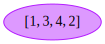

Step no:  2


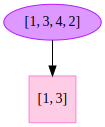

Step no:  3


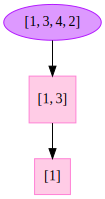

Step no:  4


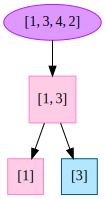

Step no:  5


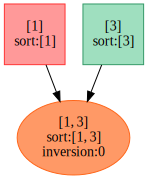

Step no:  6


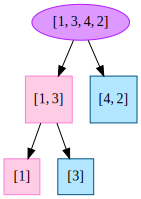

Step no:  7


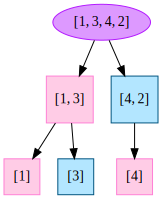

Step no:  8


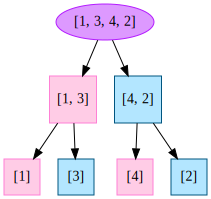

Step no:  9


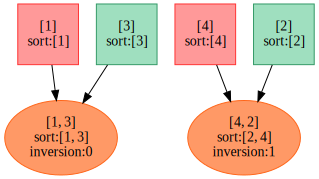

Step no:  10


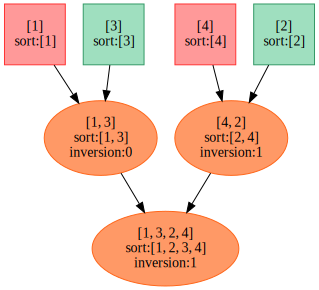

In [14]:
    total = sort_and_count(A, 0, n-1, 1, root) 

## Total Number of Inversions
This output the final result (The total number of inversions required for the given array)

In [15]:
  print("Number of total inversions is: ", total)

Number of total inversions is:  2


## Figure 2: Overall Divide Procedure
This figure shows the final 'Divide Tree'.

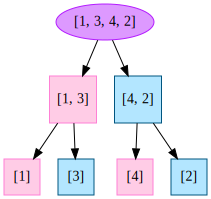

In [16]:
display(divide)

## Figure 3: Overall Merge and Sort Procedure
This figure shows the final 'Merge and Sort Tree'.

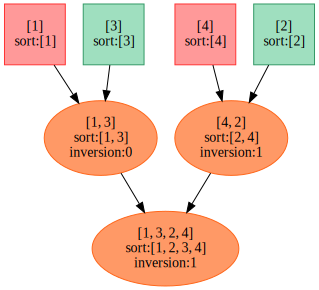

In [17]:
display(conquer)

## Figure 4: The Whole Counting Inversion Process (Divide and Merge+Sort) Shown Step by Step Using Animation
This is an animated graph. It shows how the whole procedure works step by step sequentially. 

For example, all the possible steps for the default example are shown below: <br>
Step 1: Initially there's one sinlge array \[1,3,4,2\] <br>
Step 2: First \[1,3,4,2\] is divided and left branch \[1,3\] is created. <br>
Step 3 and 4: \[1,3\]  is divided into \[1\]  and \[3\]  <br>
Step 5: Then \[1\]  and \[3\] is merged back as a sorted array into \[1,3\] <br>
Step 6: Then the right branch \[4,2\] is created. <br>
Step 7 and 8: Then \[4,2\] is divided in \[4\] and \[2\] <br>
Step 9: \[4\] and \[2\] are merged into a sorted array \[2,4\] <br>
Step 10: Finally, \[1,3\] and \[2,4\] are merged back into a sorted array \[1,2,3,4\] <br>


<IPython.core.display.Javascript object>


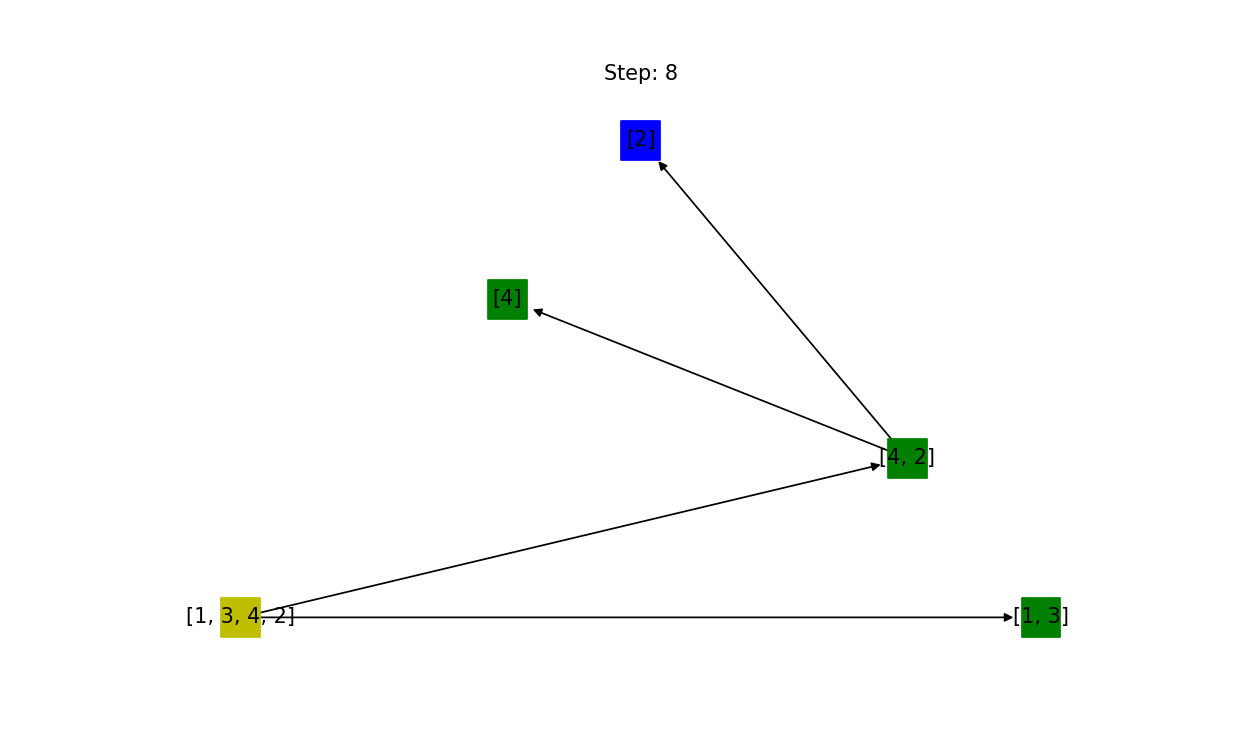

In [19]:
step = 1

def animate(i):
 
    global step
    G_div = nx.read_gpickle("graph_"+str(step)+".pickle")
    colors = ['r', 'b', 'g', 'y', 'm']
    fig.clf()
    num = G_div.number_of_nodes()
    plt.title('Step: %i' %step)
    nx.draw(G_div, pos=nx.planar_layout(G_div), node_color=[random.choice(colors) for j in range(num)], node_shape = 's', node_size = 500, with_labels=True)
    step += 1

fig = plt.gcf()
fig.set_size_inches(10,6)

anim = animation.FuncAnimation(fig, animate, frames=100, interval=3500, blit=True)

<h1><center><font color=blue><b>Thank you for reviewing!!!</b></font></center></h1>